# **Weather temperature Prediction**

The aim of this project to see to do the prediction of the weather using the different types of machine learning model like Decision Tree Regressor, Random Forest Regressor and Linear Regessor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from matplotlib.pyplot import figure
import plotly.io as pio
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
data = pd.read_csv(r"/content/DailyDelhiClimateTrain.csv")

In [15]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


##  **Data Cleaning**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [17]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [18]:
print (data['date'].dtype)

object


In [19]:
data['date'] = pd.to_datetime(data['date'])

In [21]:
print (data['date'].dtype)

datetime64[ns]


In [22]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [23]:
data

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5
...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12,31


In [24]:
data.year.value_counts()

2016    366
2013    365
2014    365
2015    365
2017      1
Name: year, dtype: int64

## **Data Analysis**

In [26]:
correlation = data.corr()

<ipython-input-26-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


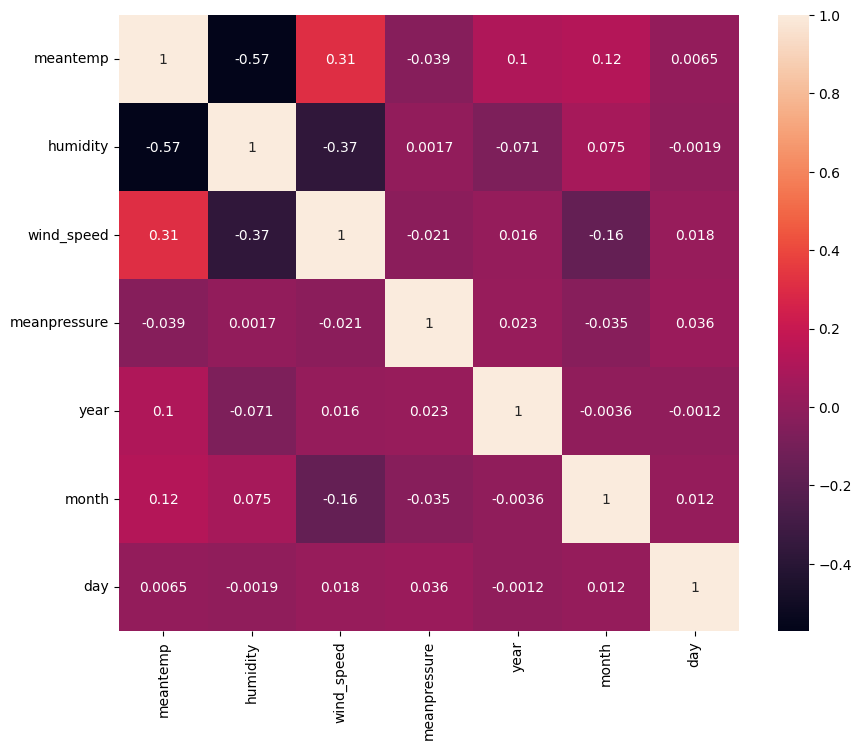

In [27]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='rocket')
plt.show()

In [28]:
fig = px.line(data, x='date', y="meantemp")
fig.show()

In [29]:
fig = px.scatter(data, x="meantemp", y="humidity" , color="meantemp")
fig.show()

In [31]:
data_2016 = data[data["year"] == 2016]
data_2016

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
1095,2016-01-01,14.714286,72.285714,1.057143,1021.142857,2016,1,1
1096,2016-01-02,14.000000,75.875000,2.087500,1021.000000,2016,1,2
1097,2016-01-03,14.375000,74.750000,5.112500,1018.500000,2016,1,3
1098,2016-01-04,15.750000,77.125000,0.000000,1017.625000,2016,1,4
1099,2016-01-05,15.833333,88.833333,0.616667,1017.000000,2016,1,5
...,...,...,...,...,...,...,...,...
1456,2016-12-27,16.850000,67.550000,8.335000,1017.200000,2016,12,27
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30


In [32]:
data2016Monthly = data_2016.groupby("month")["meantemp"].mean()

In [33]:
data2016Monthly = data2016Monthly.to_frame().reset_index()

In [35]:
data2016Monthly

,month,meantemp
0,1,15.139363
1,2,19.025676
2,3,25.701075
3,4,32.550029
4,5,34.728726
5,6,34.946836
6,7,30.875806
7,8,31.116578
8,9,31.479768
9,10,28.961680


In [36]:
fig = px.bar(data2016Monthly, x="month", y="meantemp", color="month")
fig.show()

In [90]:
x = data.drop(['meantemp' , "date" ,"wind_speed"  , "meanpressure"   , "year"] , axis=1)
x

,humidity,month,day
0,84.500000,1,1
1,92.000000,1,2
2,87.000000,1,3
3,71.333333,1,4
4,86.833333,1,5
...,...,...,...
1457,68.043478,12,28
1458,87.857143,12,29
1459,89.666667,12,30
1460,87.000000,12,31


In [95]:
y = data['meantemp']

In [96]:
y

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64

#**LinearRegression**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
lin_reg_model = LinearRegression()

In [111]:
lin_reg_model.fit(x,y)

LinearRegression()

In [112]:
lin_reg_model.score(x,y)

0.3546949860534261

In [50]:
test = pd.read_csv(r"/content/DailyDelhiClimateTest.csv")

In [51]:
test['date'] = pd.to_datetime(test['date'])

In [52]:
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [53]:
test

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,2
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,3
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,4
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,5
...,...,...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,20
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,21
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,22
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,2017,4,23


In [54]:
x_test = test.drop(['meantemp' , "date" ,"wind_speed" , "meanpressure" , "year"] , axis=1)

In [55]:
y_test = test.meantemp

In [56]:
training_data_prediction = lin_reg_model.predict(x_test)

In [57]:
training_data_prediction[:10]

array([17.0724272 , 19.28959546, 18.0973183 , 21.13177615, 19.88116976,
       18.7639058 , 14.53747414, 17.69181015, 18.39028566, 20.66321174])

In [58]:
y_test[:10]

0    15.913043
1    18.500000
2    17.111111
3    18.700000
4    18.388889
5    19.318182
6    14.708333
7    15.684211
8    14.571429
9    12.111111
Name: meantemp, dtype: float64

In [59]:
train_error_score = metrics.r2_score(y_test ,training_data_prediction)

In [60]:
train_error_score

0.44267542155927353

In [62]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, training_data_prediction)
errors

22.346310657428816

In [146]:
lin_mae = mean_absolute_error(y_test, training_data_prediction)
lin_mae

3.7654086262698487

#**DecisionTreeRegressor & RandomForestRegressor**

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

models = [
    DecisionTreeRegressor(random_state= 42),
    RandomForestRegressor(random_state= 42)
]

param_grid = [
    {'max_depth': [2, 4, 6, 8]},
    {'n_estimators': [300,500,700]}
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(x, y)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("-"*100)

DecisionTreeRegressor:
Best parameters: {'max_depth': 8}
Best score: 0.8587340487839157
----------------------------------------------------------------------------------------------------
RandomForestRegressor:
Best parameters: {'n_estimators': 500}
Best score: 0.8813780581188466
----------------------------------------------------------------------------------------------------


In [114]:
R_model = RandomForestRegressor(random_state= 42,n_estimators=500 )
R_model.fit(x,y)
Prediction = R_model.predict(x_test)

In [115]:
Prediction[:10]

array([ 9.71360774, 13.2086119 , 13.01844762, 12.18354762, 13.5476881 ,
       11.59258333, 13.58896667, 13.23791667, 12.12474167, 13.06941071])

In [116]:
y_test[:10]

0    15.913043
1    18.500000
2    17.111111
3    18.700000
4    18.388889
5    19.318182
6    14.708333
7    15.684211
8    14.571429
9    12.111111
Name: meantemp, dtype: float64

In [117]:
train_error_score2 = metrics.r2_score(y_test ,Prediction)
train_error_score2

0.7837693922668708

In [118]:
errors = mean_squared_error(y_test, Prediction)
errors

8.66991430302231

In [119]:
lin_mae = mean_absolute_error(y_test, Prediction)
lin_mae

2.374291004643455

#**Boosting**

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
#big model and has differents models inside
gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=500,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(x, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=8, n_estimators=500,
                          random_state=42)

In [79]:
pre = gbrt.predict(x_test)
pre[:10]

array([ 9.72364061, 13.92489368, 16.13950692, 12.90527565, 14.7676669 ,
       13.63317057, 15.16658927, 16.78455728, 10.62729203, 12.89582765])

In [80]:
y_test[:10]

0    15.913043
1    18.500000
2    17.111111
3    18.700000
4    18.388889
5    19.318182
6    14.708333
7    15.684211
8    14.571429
9    12.111111
Name: meantemp, dtype: float64

In [81]:
train_error_score3 = metrics.r2_score(y_test ,pre)
train_error_score3

0.7383091044900878

In [82]:
errors2 = mean_squared_error(y_test, pre)
errors2

10.492675675001076

In [148]:
lin_mae2 = mean_absolute_error(y_test, pre)
lin_mae2

2.534687730936641

#**Stacking**

In [130]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state= 42, max_depth=8)),
    ('linear', LinearRegression()),
    ('random_forest', RandomForestRegressor(random_state= 42,n_estimators=500 ))
]

meta_model = RandomForestRegressor(random_state= 42,n_estimators=500 )

stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

stacking_regressor.fit(x, y)

predictions2 = stacking_regressor.predict(x_test)


In [131]:
predictions2[:10]

array([14.01209957, 13.06514386, 13.1557881 , 14.59961773, 13.12627531,
       13.61439693, 13.28530833, 12.459425  , 13.95947738, 12.78594737])

In [132]:
y_test[:10]

0    15.913043
1    18.500000
2    17.111111
3    18.700000
4    18.388889
5    19.318182
6    14.708333
7    15.684211
8    14.571429
9    12.111111
Name: meantemp, dtype: float64

In [135]:
train_error_score3 = metrics.r2_score(y_test ,predictions2)
train_error_score3

0.7381730285498385

In [133]:
errors3 = mean_squared_error(y_test, predictions2)
errors3

10.498131733017253

In [149]:
lin_mae3 = mean_absolute_error(y_test, predictions2)
lin_mae3

2.6180379688225313